# Simulation & Modeling

## Online assessment 3

**Rifaz Nahiyan**

*011 152 054*


Q: Given a function, y = f(x), find the value of integration by using the Monte Carlo method.

In [1]:
from random import random
import matplotlib.pyplot as plotter
from numpy import linspace

In [2]:
def f(x):
    return (2 * (x ** 3)) + 9

lower_bound = 3
upper_bound = 5
actual_area = 290
num_trials = 1000
errors = []
X = {
    'goods': [],
    'bads': []
}
Y = {
    'goods': [],
    'bads': []
}

In [3]:
def get_random(lower, upper):
    return round((random() * (upper - lower)) + lower, 2)

In [4]:
errors.clear()
for epoch in range(100, num_trials+1, 100):
    hits = 0
    
    for i in range(epoch):
        x_rand = get_random(lower_bound, upper_bound)
        tmp1 = f(lower_bound)
        tmp2 = f(upper_bound)
        upper_y = tmp1 if tmp1 > tmp2 else tmp2
        y_rand = get_random(0, upper_y)
        
        y_curve = f(x_rand)
        
        if y_rand <= y_curve:
            hits += 1
            Y['goods'] += [y_rand]
            X['goods'] += [x_rand]
        else:
            Y['bads'] += [y_rand]
            X['bads'] += [x_rand]
    
    est_area = (hits * (upper_bound - lower_bound) * f(upper_bound)) / epoch
    print(f'Trials: {epoch}')
    print(f'\tHits: {hits}; Est. area: {est_area}')
    error = abs(actual_area - est_area)
    print(f'\tError: {error}')
    errors += [error]

Trials: 100
	Hits: 44; Est. area: 227.92
	Error: 62.08000000000001
Trials: 200
	Hits: 108; Est. area: 279.72
	Error: 10.279999999999973
Trials: 300
	Hits: 165; Est. area: 284.9
	Error: 5.100000000000023
Trials: 400
	Hits: 241; Est. area: 312.095
	Error: 22.095000000000027
Trials: 500
	Hits: 266; Est. area: 275.576
	Error: 14.423999999999978
Trials: 600
	Hits: 333; Est. area: 287.49
	Error: 2.509999999999991
Trials: 700
	Hits: 366; Est. area: 270.84
	Error: 19.160000000000025
Trials: 800
	Hits: 405; Est. area: 262.2375
	Error: 27.76249999999999
Trials: 900
	Hits: 523; Est. area: 301.0155555555556
	Error: 11.01555555555558
Trials: 1000
	Hits: 567; Est. area: 293.706
	Error: 3.7060000000000173


Drawing graphs for 100 trials, and 1000 trials


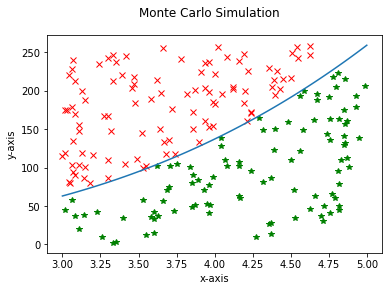

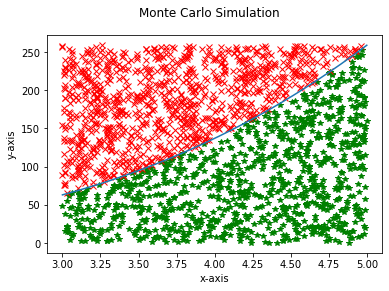

In [5]:
print('Drawing graphs for 100 trials, and 1000 trials')

plotter.xlabel('x-axis')
plotter.ylabel('y-axis')
plotter.suptitle('Monte Carlo Simulation')
plotter.plot(X['goods'][:100], Y['goods'][:100], 'g*')
plotter.plot(X['bads'][:100], Y['bads'][:100], 'rx')
plotter.plot(
    linspace(lower_bound, upper_bound, 100),
    [f(_x) for _x in linspace(lower_bound, upper_bound, 100)]
)
plotter.show()

plotter.xlabel('x-axis')
plotter.ylabel('y-axis')
plotter.suptitle('Monte Carlo Simulation')
plotter.plot(X['goods'][-1000:], Y['goods'][-1000:], 'g*')
plotter.plot(X['bads'][-1000:], Y['bads'][-1000:], 'rx')
plotter.plot(
    linspace(lower_bound, upper_bound, 1000),
    [f(_x) for _x in linspace(lower_bound, upper_bound, 1000)]
)
plotter.show()

Printing the Error graph.


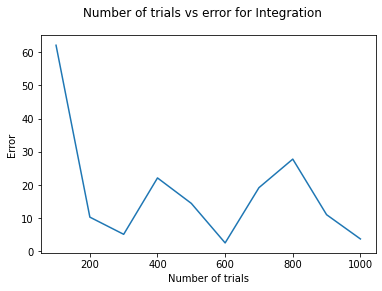

In [7]:
print(f'Printing the Error graph.')

plotter.xlabel('Number of trials')
plotter.ylabel('Error')
plotter.suptitle('Number of trials vs error for Integration')
plotter.plot(list(range(100, 1001, 100)), errors)